In [185]:
import pandas as pd
import numpy as np

In [186]:
import seaborn as sns

In [187]:
from unidecode import unidecode

In [1]:
str.replace?

In [188]:
def norm(x):
    x = x.replace(".", "")
    x = x.replace(",", "")
    
    return unidecode(x.strip().lower())

In [189]:
cnts = pd.read_csv("../data/pre-process/contratos_4.csv", parse_dates=['start_date'])

In [190]:
cnts['year'] = cnts['start_date'].dt.year

In [191]:
cnts['CRI'] = np.abs(cnts['CRI'])

In [ ]:
parts = pd.read_json("../data/tables/s3-particulares-sfp.json")

parts['year'] = pd.to_datetime(parts.fechaCaptura).dt.year.astype(int)

In [192]:
parts['little'] = parts['nombreRazonSocial'].apply(norm)

In [193]:
parts['year'] = pd.to_datetime(parts.fechaCaptura).dt.year.astype(int)

In [194]:
parts['little'] = parts['nombreRazonSocial'].apply(norm)

In [195]:
fantasmas = pd.read_csv("../data/tables/fantasmas.csv", delimiter="\n", names=['supplier'])

fantasmas['little'] = fantasmas['supplier'].apply(norm)

In [197]:
fantasmas['fantasma'] = 1

In [198]:
parts['bad'] = 1

In [199]:
cnts['little'] = cnts['supplier'].apply(norm)

In [200]:
cnts = pd.merge(cnts, parts[['little', 'bad']], how='left')

In [201]:
cnts = pd.merge(cnts, fantasmas[['little', 'fantasma']], how='left')

In [202]:
cnts['bad'] = cnts['bad'].fillna(0)

In [203]:
cnts.shape

(1541571, 38)

In [204]:
cnts.bad.value_counts()

0.0    1522527
1.0      19044
Name: bad, dtype: int64

In [205]:
mean_cri = []
np.random.seed(42)
for i in range(1000):
    X = np.random.randint(0, cnts.shape[0], 19044)
    mean_cri.append(cnts.iloc[X].CRI.mean())

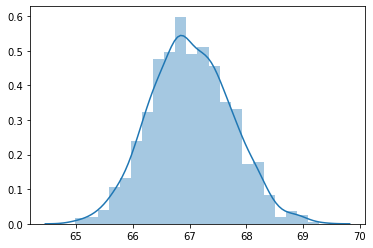

In [206]:
sns.distplot(mean_cri)

In [207]:
cnts[cnts.fantasma==1].CRI.describe()

count     8.000000
mean     14.025648
std       9.361162
min       1.190283
25%       6.042290
50%      16.383477
75%      18.139456
max      30.358626
Name: CRI, dtype: float64

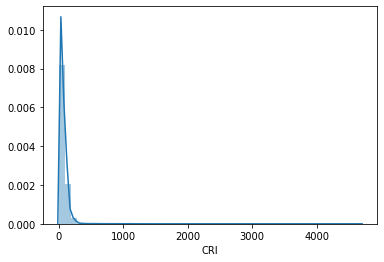

In [208]:
sns.distplot(cnts.CRI)

In [209]:
cnts.CRI.describe()

count    876340.000000
mean         66.996708
std          72.859933
min           0.000026
25%          25.167986
50%          48.784387
75%          88.852803
max        4689.071692
Name: CRI, dtype: float64

In [210]:
cnts[cnts.bad==1].CRI.describe()

count    15799.000000
mean        57.038640
std         54.489092
min          0.008033
25%         28.132094
50%         46.281926
75%         69.250383
max       1335.930246
Name: CRI, dtype: float64

In [211]:
cnts[cnts.bad==1].loc[109]

id                                                                 90877
start_date                                           2012-02-08 00:00:00
amount                                                       1.44475e+06
ramo                                                                  51
desc_ramo              Instituto de Seguridad y Servicios Sociales de...
person                                                                 0
buyer                  ISSSTE-Jefatura de Servicios de Adquisición de...
file_size                                                              7
single_bid                                                             0
contract_duration                                                    327
prop_window                                                            1
daily_price                                                         4418
contract_type                                                   Purchase
gvmnt_level                                        

In [212]:
cnts.CRI.quantile(.99)

277.0372867662278

In [213]:
cnts = cnts.drop('little', axis=1)

In [214]:
#cnts.to_csv("../data/pre-process/contratos_5.csv", index=False)